In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from xgboost import XGBRegressor

from sklearn.preprocessing import LabelEncoder

from sklearn.neighbors import KNeighborsClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import train_test_split



In [2]:
df = pd.read_csv("E-commerce Customer Behavior - Sheet1.csv")

In [3]:
df.head()

,Customer ID,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase,Satisfaction Level
0,101,Female,29,New York,Gold,1120.20,14,4.6,True,25,Satisfied
1,102,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18,Neutral
2,103,Female,43,Chicago,Bronze,510.75,9,3.4,True,42,Unsatisfied
3,104,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12,Satisfied
4,105,Male,27,Miami,Silver,720.40,13,4.0,True,55,Unsatisfied


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               350 non-null    int64  
 1   Gender                    350 non-null    object 
 2   Age                       350 non-null    int64  
 3   City                      350 non-null    object 
 4   Membership Type           350 non-null    object 
 5   Total Spend               350 non-null    float64
 6   Items Purchased           350 non-null    int64  
 7   Average Rating            350 non-null    float64
 8   Discount Applied          350 non-null    bool   
 9   Days Since Last Purchase  350 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 27.8+ KB


In [5]:
df.dropna().info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 348 entries, 0 to 349
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               348 non-null    int64  
 1   Gender                    348 non-null    object 
 2   Age                       348 non-null    int64  
 3   City                      348 non-null    object 
 4   Membership Type           348 non-null    object 
 5   Total Spend               348 non-null    float64
 6   Items Purchased           348 non-null    int64  
 7   Average Rating            348 non-null    float64
 8   Discount Applied          348 non-null    bool   
 9   Days Since Last Purchase  348 non-null    int64  
 10  Satisfaction Level        348 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(4)
memory usage: 30.2+ KB


In [6]:
df = df.dropna()
df.shape

(348, 11)

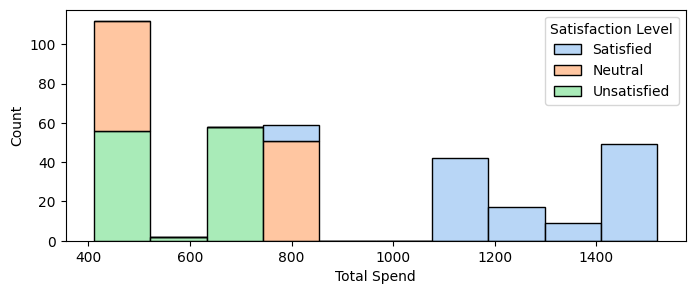

In [7]:
fig, axs = plt.subplots(ncols = 1, figsize = (8, 3))

sns.histplot(data = df, x = 'Total Spend',
             ax = axs, stat="count", multiple="stack", 
             
             palette="pastel", hue="Satisfaction Level",
             element="bars")

plt.show()

In [8]:
X = df[['Gender','Age','City','Membership Type','Total Spend','Items Purchased','Average Rating','Discount Applied','Days Since Last Purchase']]
Y = df['Satisfaction Level']
X.head()

,Gender,Age,City,Membership Type,Total Spend,Items Purchased,Average Rating,Discount Applied,Days Since Last Purchase
0,Female,29,New York,Gold,1120.20,14,4.6,True,25
1,Male,34,Los Angeles,Silver,780.50,11,4.1,False,18
2,Female,43,Chicago,Bronze,510.75,9,3.4,True,42
3,Male,30,San Francisco,Gold,1480.30,19,4.7,False,12
4,Male,27,Miami,Silver,720.40,13,4.0,True,55


In [9]:
Y.head()

0      Satisfied
1        Neutral
2    Unsatisfied
3      Satisfied
4    Unsatisfied
Name: Satisfaction Level, dtype: object

In [10]:
X = pd.get_dummies(X,prefix=['Gender'], columns=['Gender'], drop_first=True, dtype=int)
X = pd.get_dummies(X,prefix=['City'], columns=['City'], drop_first=True, dtype=int)
X = pd.get_dummies(X,prefix=['Membership Type'], columns=['Membership Type'], drop_first=True, dtype=int)
X = pd.get_dummies(X,prefix=['Discount Applied'], columns=['Discount Applied'], drop_first=True, dtype=int)

le = LabelEncoder()
Y = le.fit_transform(Y)

In [11]:
X.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver,Discount Applied_True
0,29,1120.20,14,4.6,25,0,0,0,0,1,0,1,0,1
1,34,780.50,11,4.1,18,1,0,1,0,0,0,0,1,0
2,43,510.75,9,3.4,42,0,0,0,0,0,0,0,0,1
3,30,1480.30,19,4.7,12,1,0,0,0,0,1,1,0,0
4,27,720.40,13,4.0,55,1,0,0,1,0,0,0,1,1


In [47]:
directory = r'F:\SOMEDATA\dataset'

In [48]:
if not os.path.exists(directory):
    os.makedirs(directory)

In [49]:
np.save(os.path.join(directory, 'Target.npy'), Y)

In [59]:
X.to_csv(os.path.join(directory, 'Samples.csv'), index = False)

In [60]:
len(X)

348

In [61]:
len(Y)

348

In [62]:
X.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver,Discount Applied_True
0,29,1120.20,14,4.6,25,0,0,0,0,1,0,1,0,1
1,34,780.50,11,4.1,18,1,0,1,0,0,0,0,1,0
2,43,510.75,9,3.4,42,0,0,0,0,0,0,0,0,1
3,30,1480.30,19,4.7,12,1,0,0,0,0,1,1,0,0
4,27,720.40,13,4.0,55,1,0,0,1,0,0,0,1,1


In [63]:
X.shape

(348, 14)

In [64]:
Y.shape

(348,)

In [65]:
save_df = pd.read_csv("dataset/Samples.csv")

In [66]:
save_df.head()

,Age,Total Spend,Items Purchased,Average Rating,Days Since Last Purchase,Gender_Male,City_Houston,City_Los Angeles,City_Miami,City_New York,City_San Francisco,Membership Type_Gold,Membership Type_Silver,Discount Applied_True
0,29,1120.20,14,4.6,25,0,0,0,0,1,0,1,0,1
1,34,780.50,11,4.1,18,1,0,1,0,0,0,0,1,0
2,43,510.75,9,3.4,42,0,0,0,0,0,0,0,0,1
3,30,1480.30,19,4.7,12,1,0,0,0,0,1,1,0,0
4,27,720.40,13,4.0,55,1,0,0,1,0,0,0,1,1


In [67]:
save_df.shape

(348, 14)

In [81]:

X_train, X_test, y_train, y_test = train_test_split(save_df, Y, random_state = 42, test_size = 0.2)


In [82]:
len(X_train)

278

In [83]:
arr = np.load("dataset/Target.npy")

In [84]:
Y.shape

(348,)

In [75]:
arr.shape

(348,)

In [78]:
Y

array([1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0,
       2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0,
       1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2,
       0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0,
       1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 1, 2, 1, 2, 0, 1, 0, 2, 1, 2,
       0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2,
       1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1,
       0, 2, 1, 2, 0, 1, 0, 2, 1, 2, 0, 1, 0, 2, 1,

yes
